In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Import Cleaned Data
data = pd.read_csv("merged.csv")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28805 entries, 0 to 28804
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   CountryCode                                              28805 non-null  object 
 1   monitoringSiteIdentifier                                 28805 non-null  object 
 2   parameterWaterBodyCategory                               28805 non-null  object 
 3   naturalAWBHMWB_AWB                                       28805 non-null  int64  
 4   naturalAWBHMWB_HMWB                                      28805 non-null  int64  
 5   naturalAWBHMWB_Natural                                   28805 non-null  int64  
 6   reservoir_Missing                                        28805 non-null  int64  
 7   reservoir_Not a reservoir                                28805 non-null  int64  
 8   reservoir_Reservoir in for

ENCODER

In [27]:
# Transform each value in parameterwaterbody
# Using Ordinal Encoder to dummies the value
from sklearn.preprocessing import OrdinalEncoder
from itertools import chain
encoder = OrdinalEncoder()
data[["parameterWaterBodyCategory"]] = encoder.fit_transform(data[["parameterWaterBodyCategory"]])

encoder_serial_number = encoder.categories_                              # Stored the Categories
encoder_serial_number = list(chain.from_iterable(encoder_serial_number)) # Flatten
encoder_data_set = pd.DataFrame( {"Number": range(len(encoder_serial_number)), 
                                  "Data": encoder_serial_number})

encoder_data_set.head()


,Number,Data
0,0,LW
1,1,RW


In [28]:
encoder_data_set.to_csv("ENCODER_paramterWaterBody.csv",index=False)

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from itertools import chain
encoder = OrdinalEncoder()
data[["CountryCode"]] = encoder.fit_transform(data[["CountryCode"]])

encoder_serial_number = encoder.categories_                              # Stored the Categories
encoder_serial_number = list(chain.from_iterable(encoder_serial_number)) # Flatten
encoder_data_set = pd.DataFrame( {"Number": range(len(encoder_serial_number)), 
                                  "Data": encoder_serial_number})

encoder_data_set.head()


,Number,Data
0,0,AT
1,1,BE
2,2,BG
3,3,CY
4,4,DE


In [30]:
encoder_data_set.to_csv("ENCODER_CountryCode.csv",index=False)

Correlation

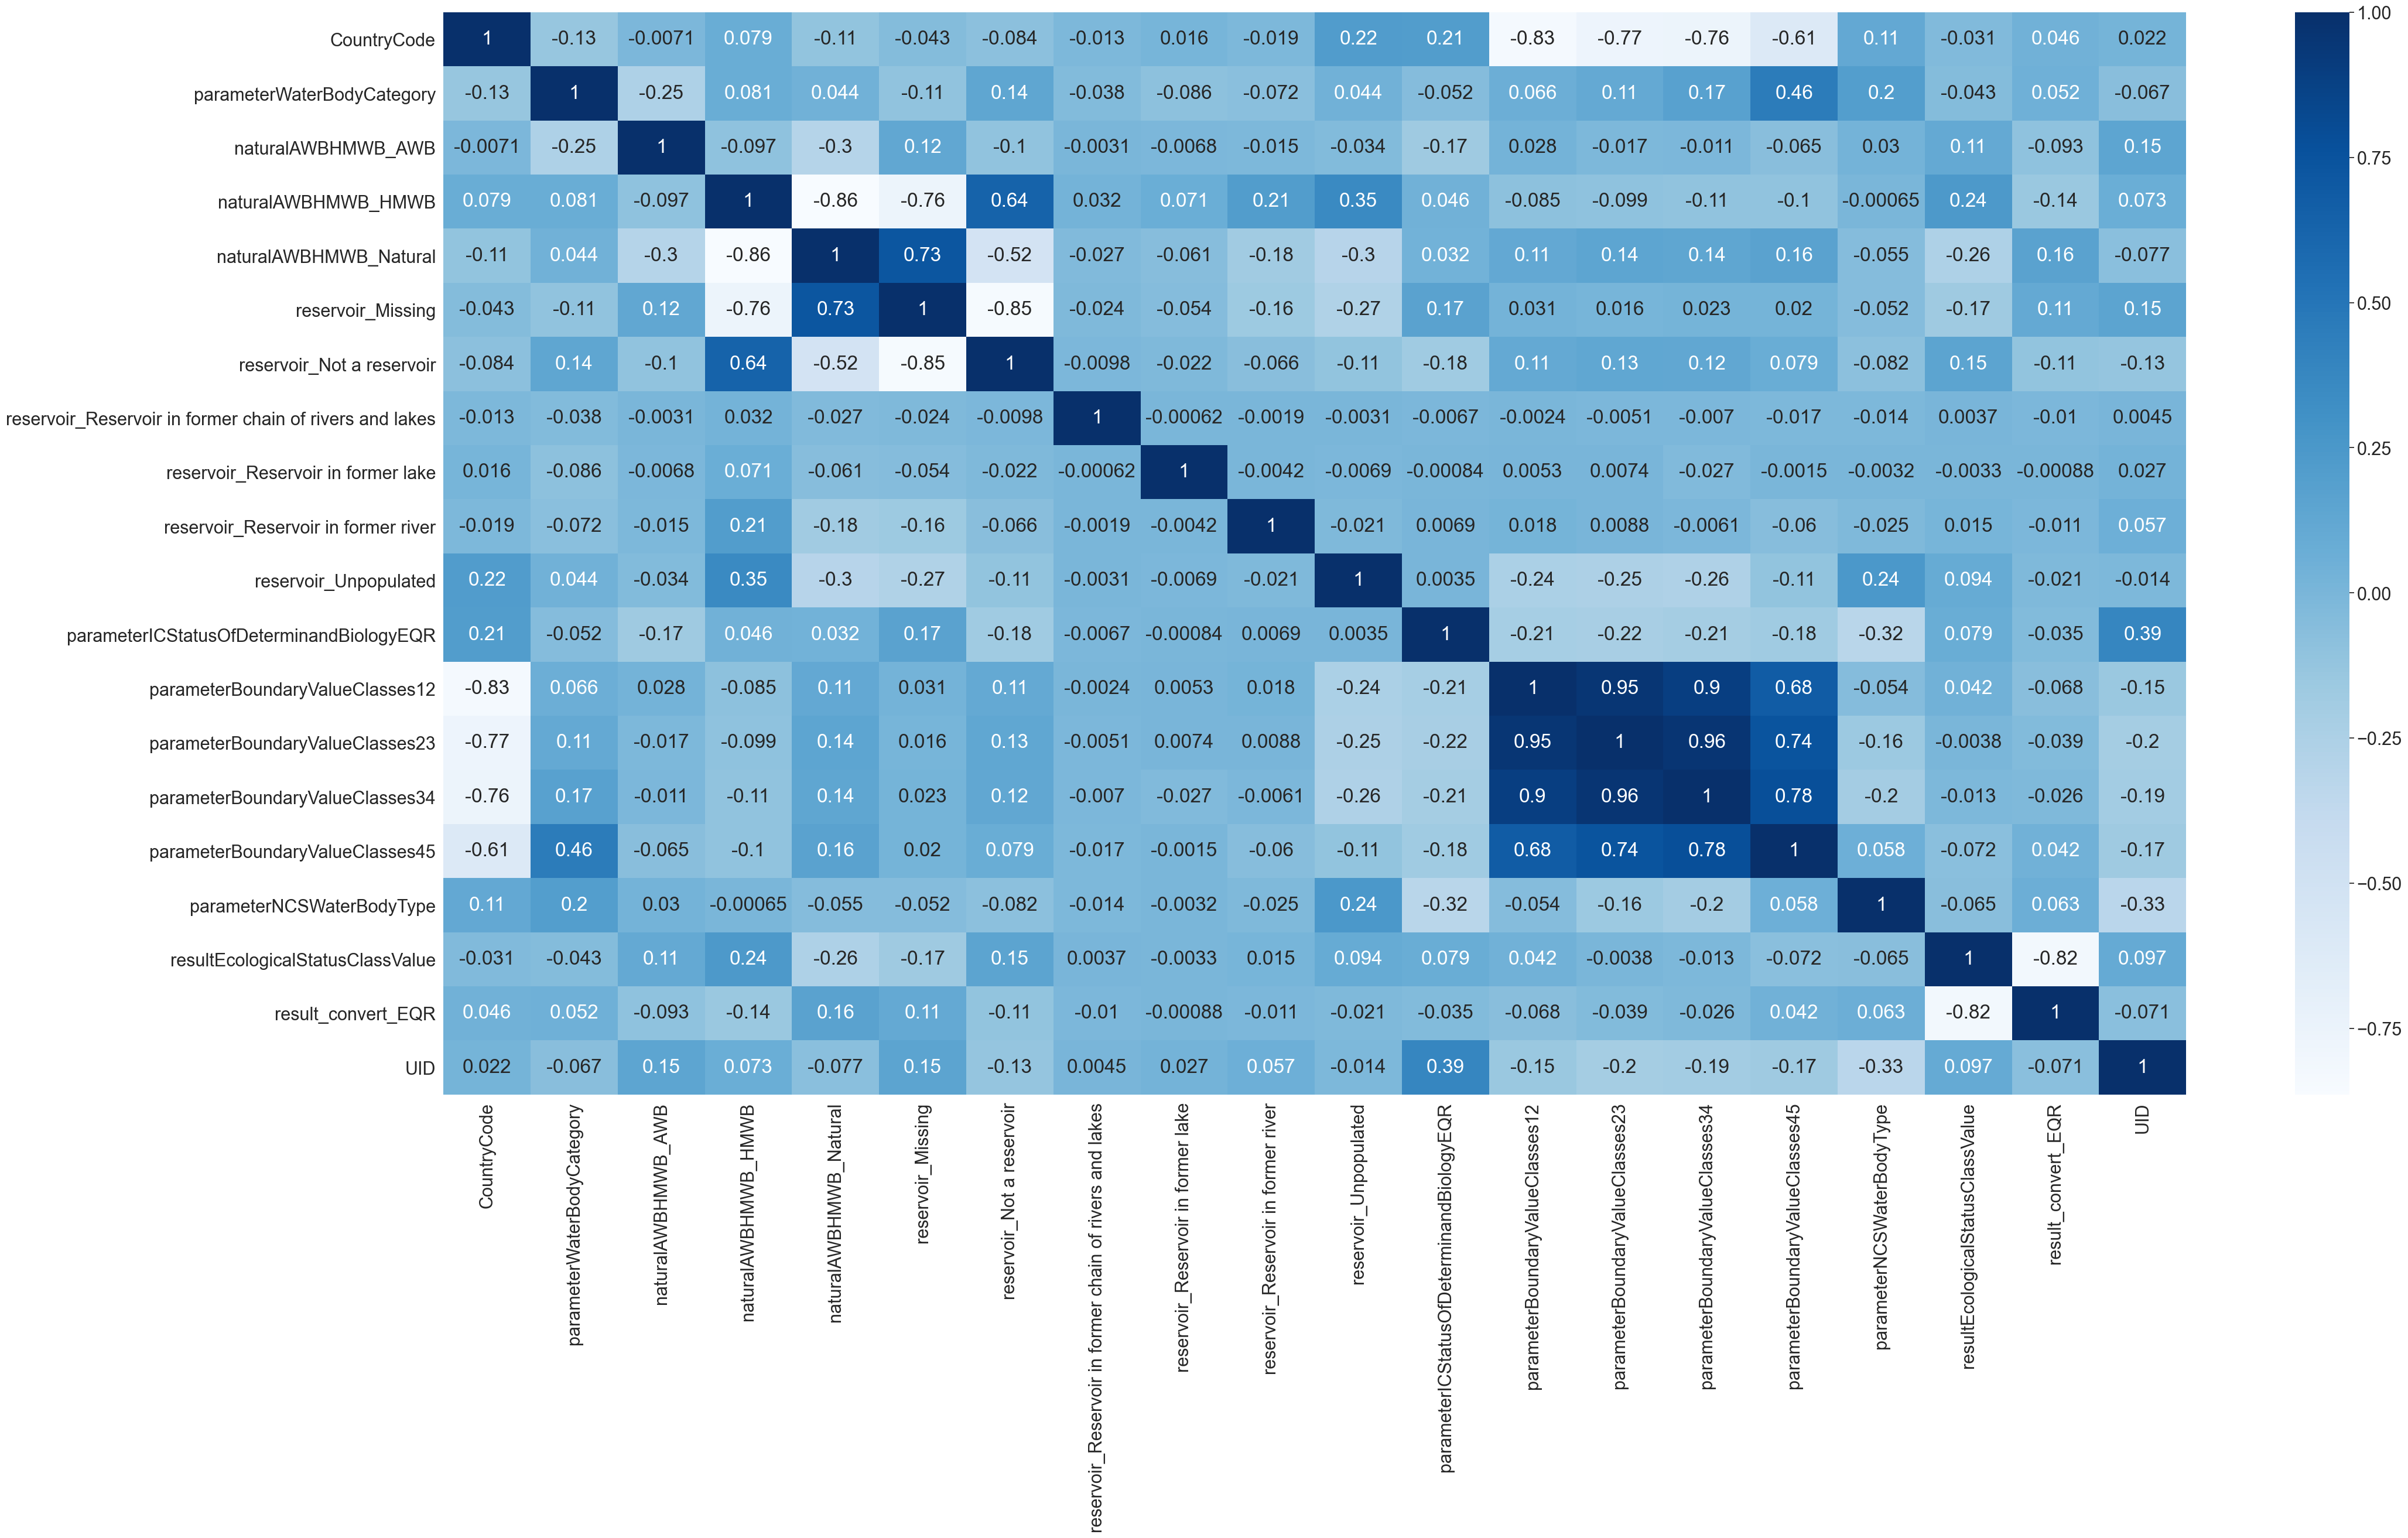

In [33]:
# Check Correlation between each correlation
sns.set(style="white",color_codes=True)            
sns.set(font_scale=2)                              
plt.figure(figsize=(48,24))                       
sns.heatmap(data.corr(),annot=True, cmap="Blues")
plt.show()

### Train Test Split

In [163]:
feature_agg = ['CountryCode',
       'parameterWaterBodyCategory', 
       'naturalAWBHMWB_AWB',
       'naturalAWBHMWB_HMWB', 
       'naturalAWBHMWB_Natural', 
       'reservoir_Missing',
       'reservoir_Not a reservoir',
       'reservoir_Reservoir in former chain of rivers and lakes',
       'reservoir_Reservoir in former lake',
       'reservoir_Reservoir in former river', 
       'reservoir_Unpopulated',
       'parameterICStatusOfDeterminandBiologyEQR',
       'parameterBoundaryValueClasses12', 
       'parameterBoundaryValueClasses23',
       'parameterBoundaryValueClasses34', 
       'parameterBoundaryValueClasses45',
       'parameterNCSWaterBodyType',
        ] 

x = data[feature_agg]           # Stored the feature variable in x
y = data['result_convert_EQR']  # Stored the target variable in y

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.3, 
                                                 random_state = 654) # 70% for training and 30% for testing

### Regular Random Forest Model

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model          = RandomForestClassifier(random_state=654)       # Regular Random Forest Without Tuning any hyper parameters
model.fit(X_train,y_train)                                      # Fit The model
y_pred         = model.predict(X_test)                          # predict the model
accuracy_score = metrics.accuracy_score(y_test,y_pred)          # accuracy
auc_score      = metrics.roc_auc_score(y_test,y_pred)           # auc
print(f"Accuracy of regular randomforest classifier : {(accuracy_score*100):.2f}")
print(f"AUC of regular randomforest classifier      : {(auc_score * 100):.2f}")

Accuracy of regular randomforest classifier : 73.25
AUC of regular randomforest classifier      : 66.50


In [165]:
# Stored it to DataFrame
Model_Scores = pd.DataFrame({"Model Name" : "Regular Random Forest Classifier",
                             "Accuracy_score": accuracy_score,
                             "AUC score" : auc_score,
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=["model 1"])
Model_Scores

,Model Name,Accuracy_score,AUC score,Precision score,Recall score,F1-score
model 1,Regular Random Forest Classifier,0.732469,0.665048,0.750939,0.884091,0.812094


In [92]:
# Look for important features

feature_importances = pd.DataFrame({"Features" : model.feature_importances_},index=X_train.columns).sort_values("Features",ascending=False)
feature_importances

,Features
parameterNCSWaterBodyType,0.575708
parameterBoundaryValueClasses12,0.064171
CountryCode,0.058320
naturalAWBHMWB_Natural,0.053987
parameterBoundaryValueClasses45,0.050545
parameterBoundaryValueClasses23,0.043804
parameterBoundaryValueClasses34,0.037468
parameterICStatusOfDeterminandBiologyEQR,0.036834
naturalAWBHMWB_HMWB,0.030289
reservoir_Not a reservoir,0.013604


### Scale

In [167]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model          = RandomForestClassifier(random_state=654)       # Scaled Regular Random Forest without Tuning any hyper parameters
model.fit(X_train,y_train)                                      # Fit The model
y_pred         = model.predict(X_test)                          # predict the model
accuracy_score = metrics.accuracy_score(y_test,y_pred)          # accuracy
random_acc     = metrics.roc_auc_score(y_test,y_pred)           # auc
print(f"Accuracy of regular randomforest classifier : {(accuracy_score*100):.2f}")
print(f"AUC of regular randomforest classifier      : {(random_acc * 100):.2f}")

Accuracy of regular randomforest classifier : 73.24
AUC of regular randomforest classifier      : 66.50


In [169]:
# Stored it to DataFrame
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Scaled Regular Random Forest Classifier",
                                          "Accuracy_score": accuracy_score,
                                          "AUC score" : auc_score,
                                          "Precision score" : metrics.precision_score(y_test,y_pred),
                                          "Recall score" : metrics.recall_score(y_test,y_pred),
                                          "F1-score": metrics.f1_score(y_test,y_pred)
                                         },index=["model 2"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Accuracy_score,AUC score,Precision score,Recall score,F1-score
model 1,Regular Random Forest Classifier,0.732469,0.665048,0.750939,0.884091,0.812094
model 2,Scaled Regular Random Forest Classifier,0.732354,0.665048,0.750902,0.883914,0.811997


### Cross Validation

In [170]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

kfold          = KFold(n_splits=10, shuffle=True, random_state=654)
model          = RandomForestClassifier(random_state=654)
y_pred         = cross_val_predict(model, x, y, cv=kfold)
accuracy_score = metrics.accuracy_score(y,y_pred)

print(f"Accuracy of Cross Validated Randomforest Classifier : {(accuracy_score*100):.2f}")

Accuracy of Cross Validated Randomforest Classifier : 73.25


In [171]:
# Stored it to DataFrame
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "KFold Cross Validated Random Forest Classifier",
                                          "Accuracy_score": metrics.accuracy_score(y,y_pred),
                                          "AUC score" : metrics.roc_auc_score(y,y_pred),
                                          "Precision score" : metrics.precision_score(y,y_pred),
                                          "Recall score" : metrics.recall_score(y,y_pred),
                                          "F1-score": metrics.f1_score(y,y_pred)
                                         },index=["model 3"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Accuracy_score,AUC score,Precision score,Recall score,F1-score
model 1,Regular Random Forest Classifier,0.732469,0.665048,0.750939,0.884091,0.812094
model 2,Scaled Regular Random Forest Classifier,0.732354,0.665048,0.750902,0.883914,0.811997
model 3,KFold Cross Validated Random Forest Classifier,0.732477,0.662970,0.756225,0.878603,0.812834


### Random Hyperparameter Grid

In [159]:
feature_agg = ['CountryCode',
       'parameterWaterBodyCategory', 
       'naturalAWBHMWB_AWB',
       'naturalAWBHMWB_HMWB', 
       'naturalAWBHMWB_Natural', 
       'reservoir_Missing',
       'reservoir_Not a reservoir',
       'reservoir_Reservoir in former chain of rivers and lakes',
       'reservoir_Reservoir in former lake',
       'reservoir_Reservoir in former river', 
       'reservoir_Unpopulated',
       'parameterICStatusOfDeterminandBiologyEQR',
       'parameterBoundaryValueClasses12', 
       'parameterBoundaryValueClasses23',
       'parameterBoundaryValueClasses34', 
       'parameterBoundaryValueClasses45',
       'parameterNCSWaterBodyType',
        ] 

x = data[feature_agg]           # Stored the feature variable in x
y = data['result_convert_EQR']  # Stored the target variable in y

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.3, 
                                                 random_state = 654) # 70% for training and 30% for testing

In [103]:
param_grid = {
    'n_estimators': [10, 50, 100 ,200 ,300 ,500 ,1000],
    'max_depth': [None, 5, 10, 20],
    "max_features" : ["auto","sqrt","log2"],
    'min_samples_split': [2, 5, 10],
    "bootstrap" : [True, False],
}

In [104]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state=654)
rf_Grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,verbose=1)

In [105]:
rf_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=654),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 300, 500, 1000]},
             verbose=1)

In [106]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 1000}

In [172]:
# Stored it to DataFrame
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Grid Best Param Random Forest Classifier",
                                          "Accuracy_score": metrics.accuracy_score(y_test,rf_Grid.best_estimator_.predict(X_test)),
                                          "AUC score" : metrics.roc_auc_score(y_test,rf_Grid.best_estimator_.predict(X_test)),
                                          "Precision score" : metrics.precision_score(y_test,rf_Grid.best_estimator_.predict(X_test)),
                                          "Recall score" : metrics.recall_score(y_test,rf_Grid.best_estimator_.predict(X_test)),
                                          "F1-score":metrics.f1_score(y_test,rf_Grid.best_estimator_.predict(X_test))
                                         },index=["model 4"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Accuracy_score,AUC score,Precision score,Recall score,F1-score
model 1,Regular Random Forest Classifier,0.732469,0.665048,0.750939,0.884091,0.812094
model 2,Scaled Regular Random Forest Classifier,0.732354,0.665048,0.750902,0.883914,0.811997
model 3,KFold Cross Validated Random Forest Classifier,0.732477,0.662970,0.756225,0.878603,0.812834
model 4,Grid Best Param Random Forest Classifier,0.661537,0.524017,0.665292,0.970802,0.789523


### Best Parameter with Kfold

In [173]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=5, shuffle=True, random_state=654)
model = RandomForestClassifier(random_state=654,bootstrap=True,max_depth=20,max_features="auto",min_samples_split=10,n_estimators=1000)
y_pred         = cross_val_predict(model, x, y, cv=kfold)
accuracy_score = metrics.accuracy_score(y,y_pred)

print(f"Accuracy of Cross Validated Randomforest Classifier : {(accuracy_score*100):.2f}")

Accuracy of Cross Validated Randomforest Classifier : 73.27


In [174]:
# Stored it to DataFrame
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "KFold on Grid Best Param Random Forest Classifier",
                                          "Accuracy_score": metrics.accuracy_score(y,y_pred),
                                          "AUC score" : metrics.roc_auc_score(y,y_pred),
                                          "Precision score" : metrics.precision_score(y,y_pred),
                                          "Recall score" : metrics.recall_score(y,y_pred),
                                          "F1-score": metrics.f1_score(y,y_pred)
                                         },index=["model 5"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Accuracy_score,AUC score,Precision score,Recall score,F1-score
model 1,Regular Random Forest Classifier,0.732469,0.665048,0.750939,0.884091,0.812094
model 2,Scaled Regular Random Forest Classifier,0.732354,0.665048,0.750902,0.883914,0.811997
model 3,KFold Cross Validated Random Forest Classifier,0.732477,0.662970,0.756225,0.878603,0.812834
model 4,Grid Best Param Random Forest Classifier,0.661537,0.524017,0.665292,0.970802,0.789523
model 5,KFold on Grid Best Param Random Forest Classifier,0.732685,0.662328,0.755553,0.880599,0.813297


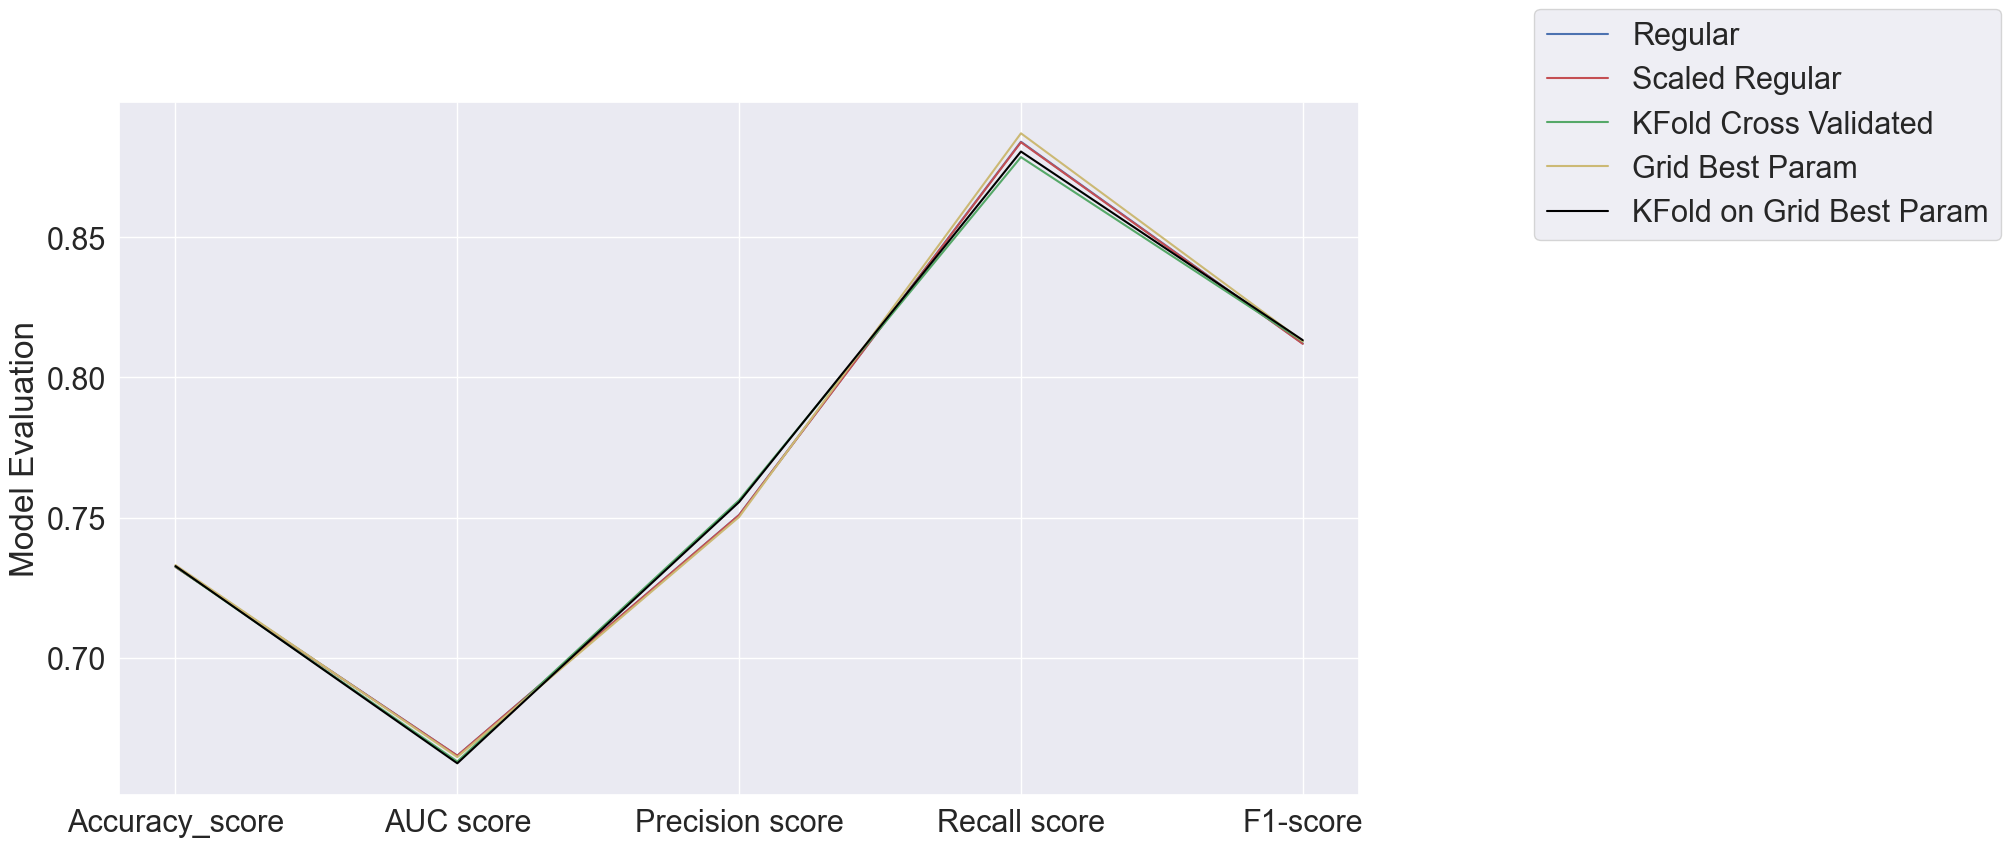

In [151]:
plt.figure(figsize=(16,9))
plt.ylabel('Model Evaluation')

Model_Scores_REG = Model_Scores[Model_Scores["Model Name"] == "Regular Random Forest Classifier"]
Model_Scores_SCA = Model_Scores[Model_Scores["Model Name"] == "Scaled Regular Random Forest Classifier"]
Model_Scores_KCV = Model_Scores[Model_Scores["Model Name"] == "KFold Cross Validated Random Forest Classifier"]
Model_Scores_GRD = Model_Scores[Model_Scores["Model Name"] == "Grid Best Param Random Forest Classifier"]
Model_Scores_KGD = Model_Scores[Model_Scores["Model Name"] == "KFold on Grid Best Param Random Forest Classifier"]

plt.plot([1,2,3,4,5], Model_Scores_REG.iloc[:,1:].values.reshape((Model_Scores_REG.iloc[:,1:].shape[1],)), color = 'b', label = 'Regular')
plt.plot([1,2,3,4,5], Model_Scores_SCA.iloc[:,1:].values.reshape((Model_Scores_SCA.iloc[:,1:].shape[1],)), color = 'r', label = 'Scaled Regular')
plt.plot([1,2,3,4,5], Model_Scores_KCV.iloc[:,1:].values.reshape((Model_Scores_KCV.iloc[:,1:].shape[1],)), color = 'g', label = 'KFold Cross Validated')
plt.plot([1,2,3,4,5], Model_Scores_GRD.iloc[:,1:].values.reshape((Model_Scores_GRD.iloc[:,1:].shape[1],)), color = 'y', label = 'Grid Best Param')
plt.plot([1,2,3,4,5], Model_Scores_KGD.iloc[:,1:].values.reshape((Model_Scores_KGD.iloc[:,1:].shape[1],)), color = 'black', label = 'KFold on Grid Best Param')
plt.xticks([1,2,3,4,5],["Accuracy_score","AUC score","Precision score","Recall score","F1-score"])
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()